# Bayesian Linear Regression via Stochastic Gradient Hamiltonian Monte Carlo

This notebook contains an illustration of Bayesian Inference using Stochastic Gradient Hamiltonian Monte Carlo on Linear Regression Model.

<table align = "left">
<tr><td>author</td><td>AL-AHMADGAID B. ASAAD</td></tr>
<tr><td>last updated</td><td>March 30, 2017</td></tr>
<tr><td>language</td><td>Julia</td></tr>
</table>


## i. Simulate Data
In order to illustrate the modeling, the data is simulated from a simple linear regression expectation function. That is the model is given by

\begin{equation}
y_i= w_0 + w_1 x_i + \varepsilon_i,\quad\varepsilon_i\sim\mathcal{N}\left(0,\alpha^{-1}\right)
\end{equation}

To do so, let $\mathbf{B}\triangleq[w_0\;w_1]^{\text{T}}=[.2\;\;-.9]^{\text{T}}, \alpha = 1 / 5.$. Generate 200 hypothetical data:

In [17]:
using DataFrames
using Distributions
using Gadfly
Gadfly.push_theme(:dark)

srand(123);

# Define data parameters
w0 = .2; w1 = -.9; stdev = 5.;
alpha = 1 / stdev;

# Generate Hypothetical Data
n = 200;
x = rand(Uniform(-1, 1), n);
A = [ones(length(x)) x];
B = [w0; w1];
f = A * B;
y = f + rand(Normal(0, alpha), n);

my_df = DataFrame(Independent = round(x, 4), Dependent = round(y, 4));
my_df |> head # View the first six observations

,Independent,Dependent
1,0.5369,-0.3164
2,0.881,-0.5236
3,0.3479,0.2077
4,-0.2091,0.3833
5,-0.3735,0.515
6,0.3251,-0.3508


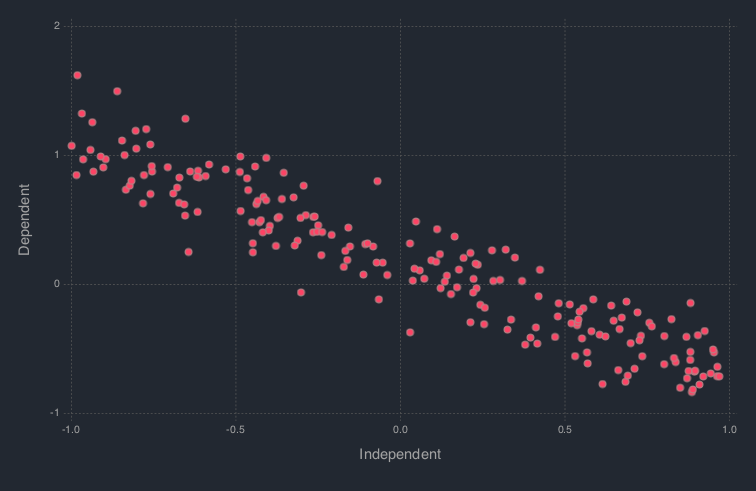

In [16]:
p = plot(my_df, x = :Independent, y = :Dependent)
draw(PNG(20cm, 13cm), p)

## ii. Estimation

To estimate the parameters of the model, a prior distribution must be specified. For this simulation study, the *a priori* for the weights $w_0$ and $w_1$ is assumed to be standard Gaussian distribution, that is

\begin{equation}
\mathbb{P}(\mathbf{w})\triangleq\mathcal{N}_d \left(\mathbf{w}; \mathbf{0}, \mathbf{I}\right)
\end{equation}

And the likelihood of the data is given by the following equation

\begin{equation}
\mathcal{L}(\mathbf{w}|\mathscr{D},\mathscr{P})=\prod_{i=1}^N\mathcal{N}(\mathscr{D}_i; \mathbf{w}^{\text{T}}\mathbf{y}, \beta)
\end{equation}

So that the posterior is given by,

\begin{equation}
\mathbb{P}(\mathbf{w}|\mathscr{D})\propto\mathbb{P}(\mathbf{w})\mathcal{L}(\mathbf{w}|\mathscr{D},\mathscr{P})
\end{equation}

In [ ]:
pur = dataset("datasets", "Puromycin");
pur_treated = sub(pur, pur[:State] .== "treated");
x = Array(pur_treated[:Conc]);
y = Array{Float64}(pur_treated[:Rate]);